In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
qpos = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPO_sim_lcsoft_dt100_feats.csv',delimiter=',')
qpoh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPO_sim_lchard_dt100_feats.csv',delimiter=',')
qpof = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPO_sim_lcfull_dt100_feats.csv',delimiter=',')
npos = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPO_sim_lcsoft_dt100_feats.csv',delimiter=',')
npoh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPO_sim_lchard_dt100_feats.csv',delimiter=',')
npof = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPO_sim_lcfull_dt100_feats.csv',delimiter=',')

In [3]:
qpos_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/QPO_sim_lcsoft_dt100.csv',delimiter=',')
qpoh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/QPO_sim_lchard_dt100.csv',delimiter=',')
qpof_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/QPO_sim_lcfull_dt100.csv',delimiter=',')
npos_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/nPO_sim_lcsoft_dt100.csv',delimiter=',')
npoh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/nPO_sim_lchard_dt100.csv',delimiter=',')
npof_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/nPO_sim_lcfull_dt100.csv',delimiter=',')

In [4]:
all_feats = np.zeros((20000,128))
all_feats[:,0] = np.arange(20000)
all_feats[:10000,1:43] = qpof
all_feats[:10000,43:85] = qpos
all_feats[:10000,85:127] = qpoh
all_feats[:10000,127] = 1
all_feats[10000:,1:43] = npof
all_feats[10000:,43:85] = npos
all_feats[10000:,85:127] = npoh
all_feats[10000:,127] = 0

In [5]:
np.random.shuffle(all_feats)

In [6]:
train_data = all_feats[:18000,1:127]
train_labels = all_feats[:18000,127]
test_data = all_feats[18000:,1:127]
test_labels = all_feats[18000:,127]

In [7]:
rf = RFC()
rf.fit(train_data,train_labels)

RandomForestClassifier()

In [8]:
print(sum(test_labels)/len(test_labels))
rf.score(test_data,test_labels)

0.497


0.899

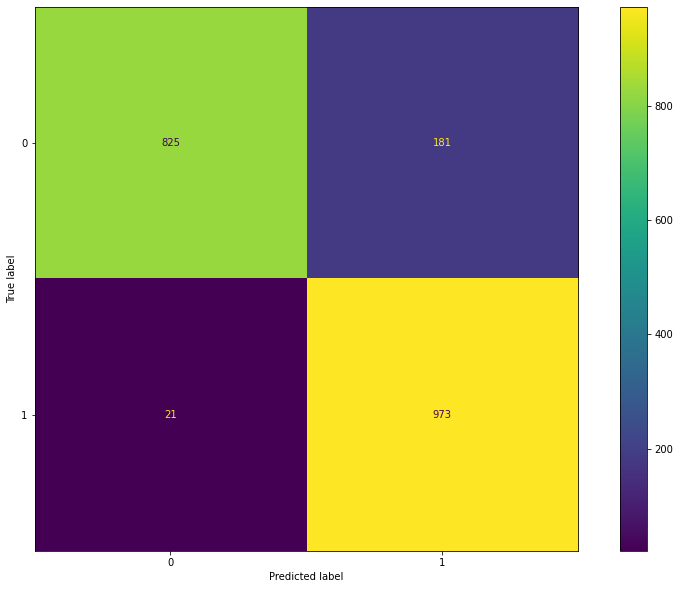

In [9]:
test_preds = rf.predict(test_data)
confmat = confusion_matrix(test_labels,test_preds)

cm_display = ConfusionMatrixDisplay(confmat).plot()

In [10]:
bad_preds = np.where(test_preds != test_labels)[0]
bad_pred_lc_nos = sorted(all_feats[18000:,0][bad_preds].astype(int))
len(bad_pred_lc_nos)

202

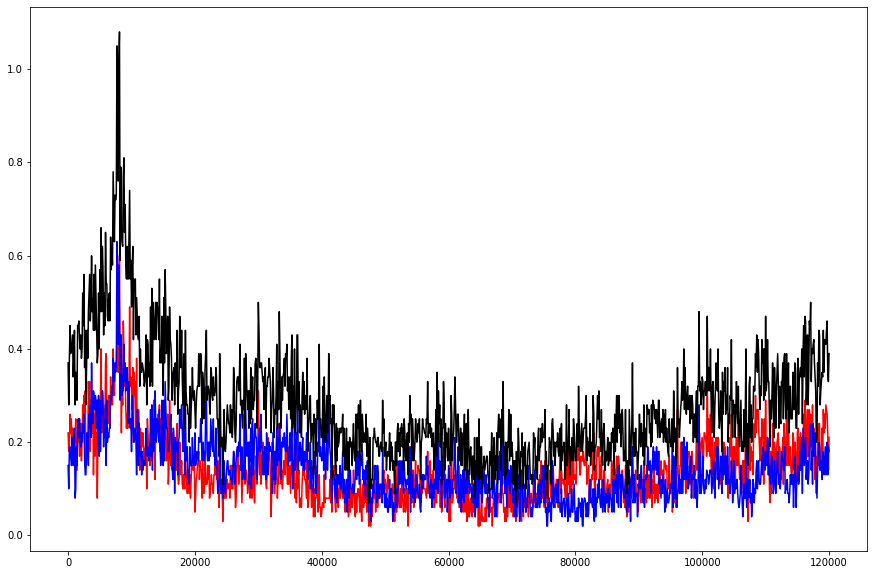

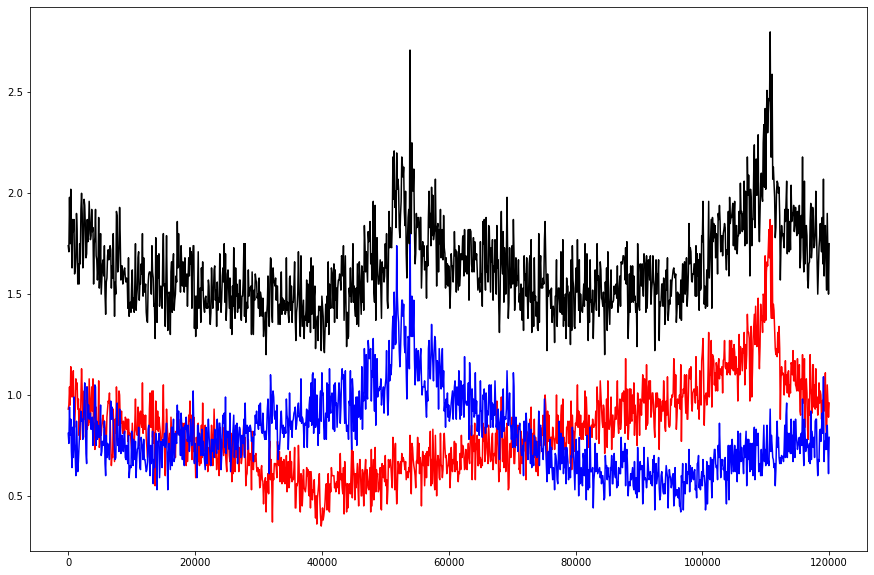

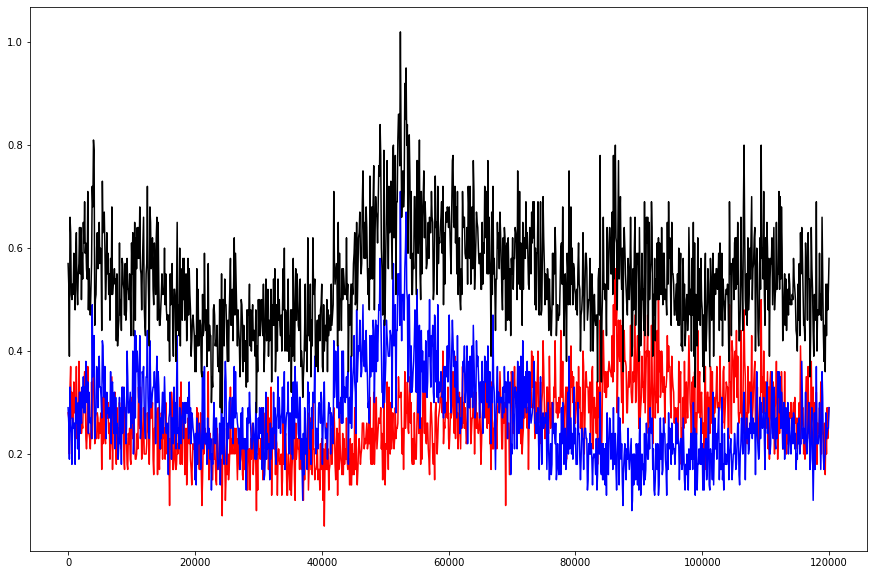

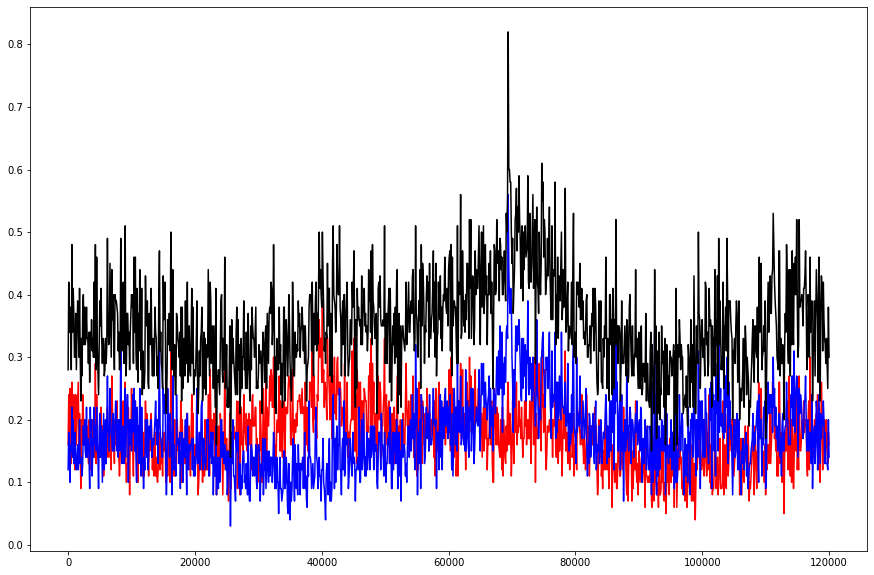

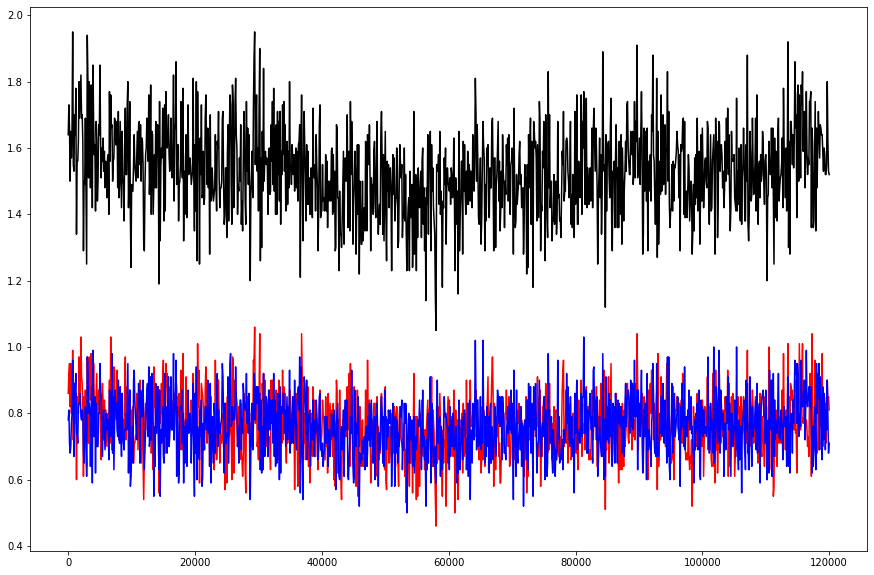

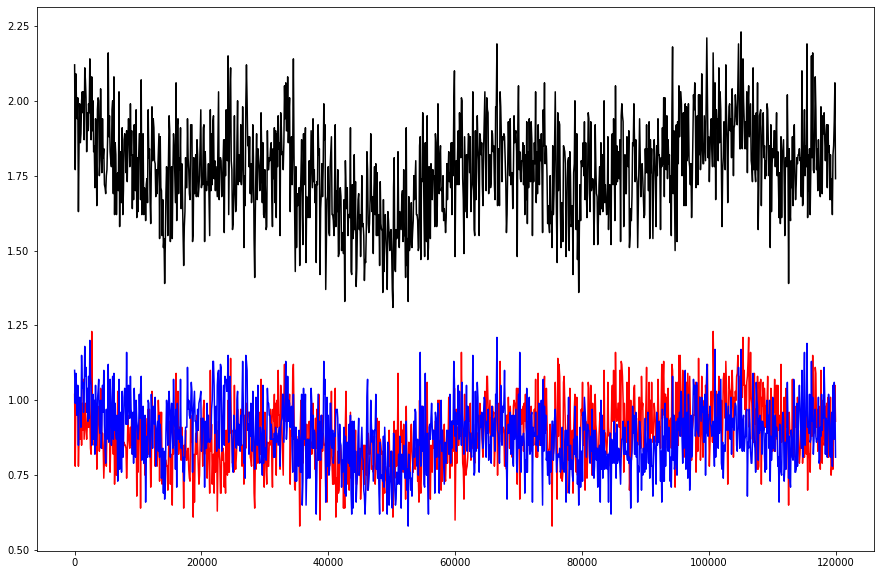

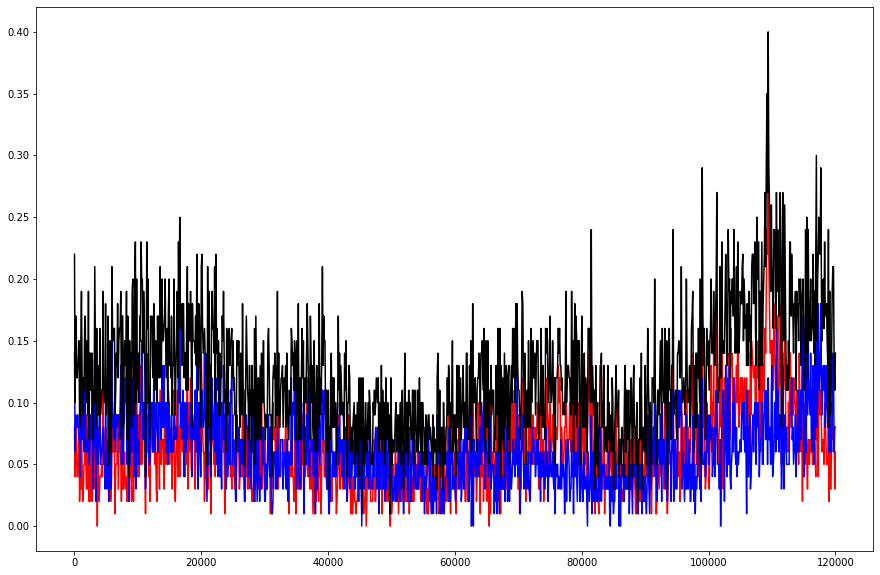

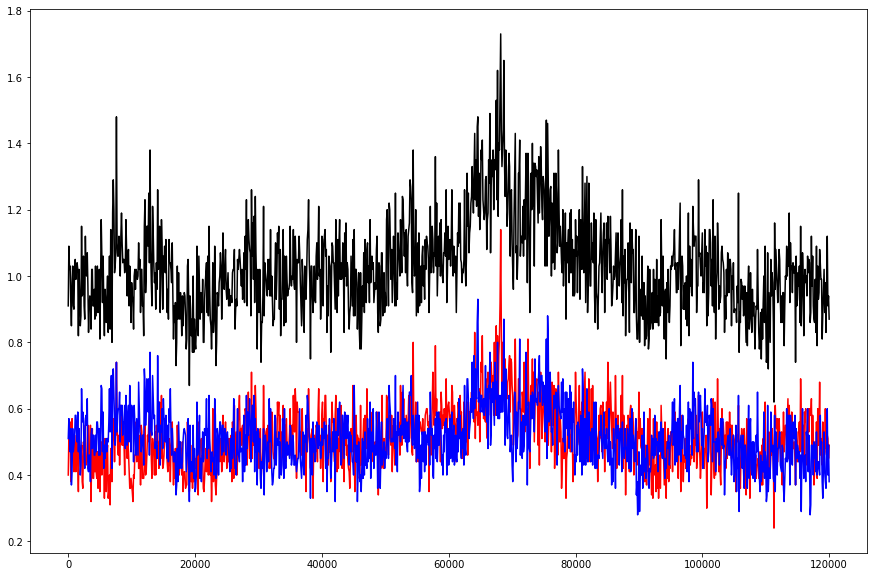

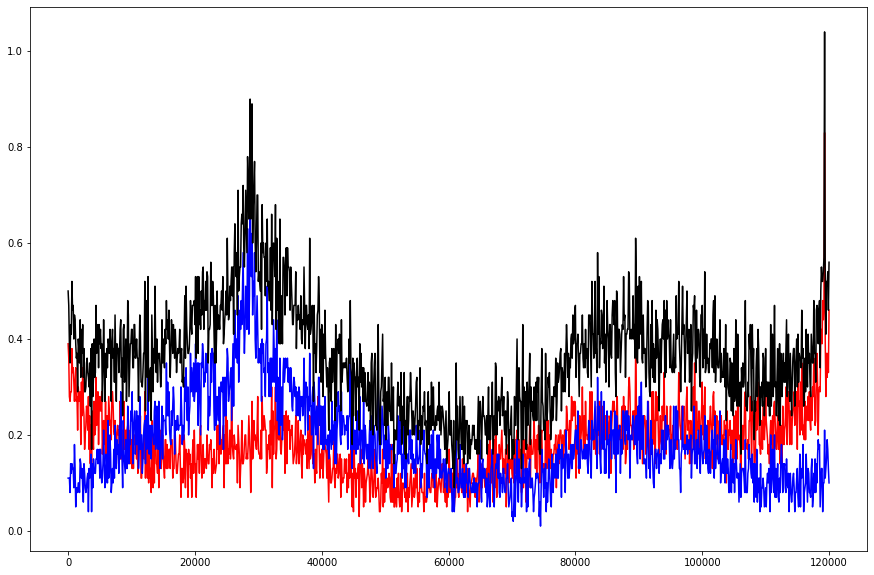

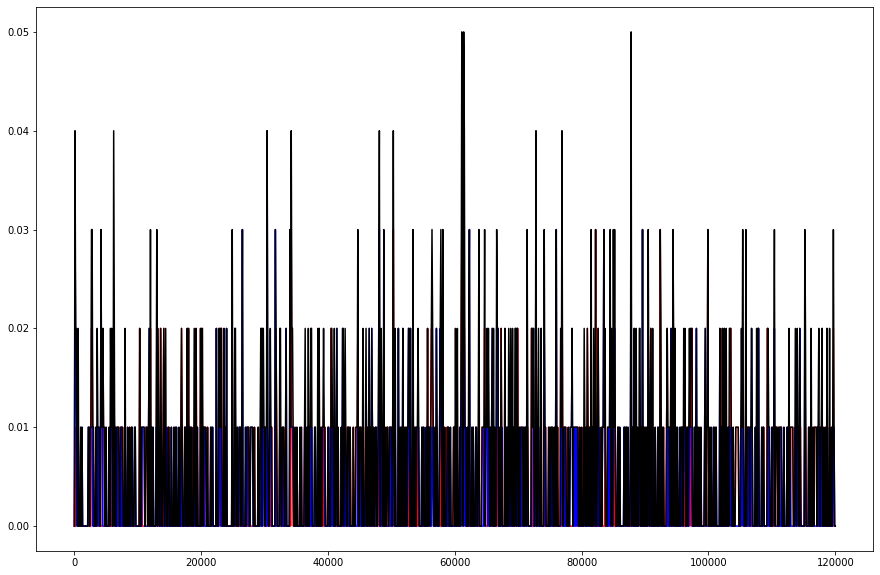

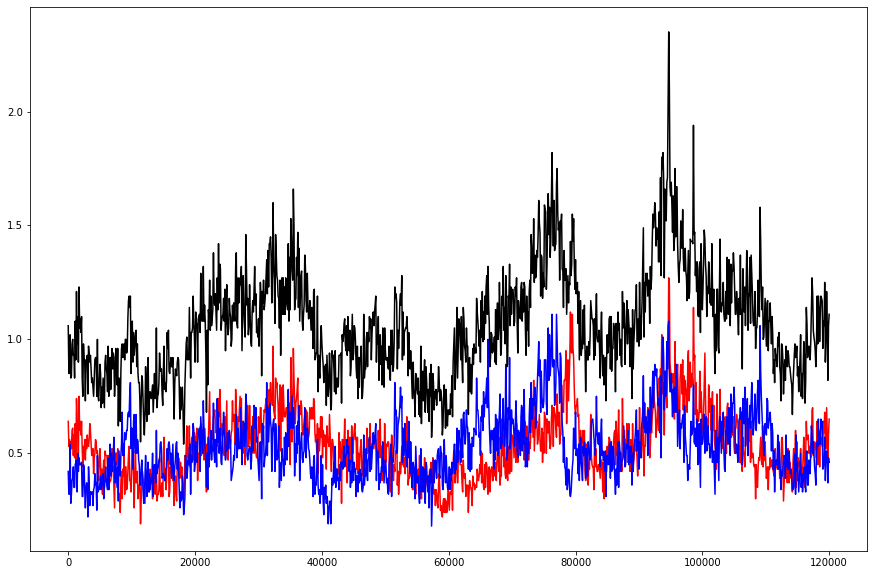

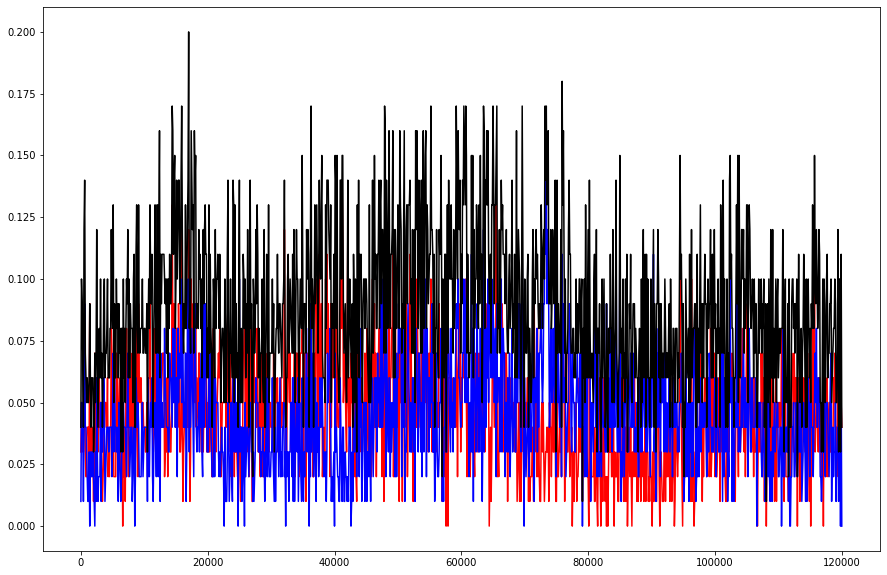

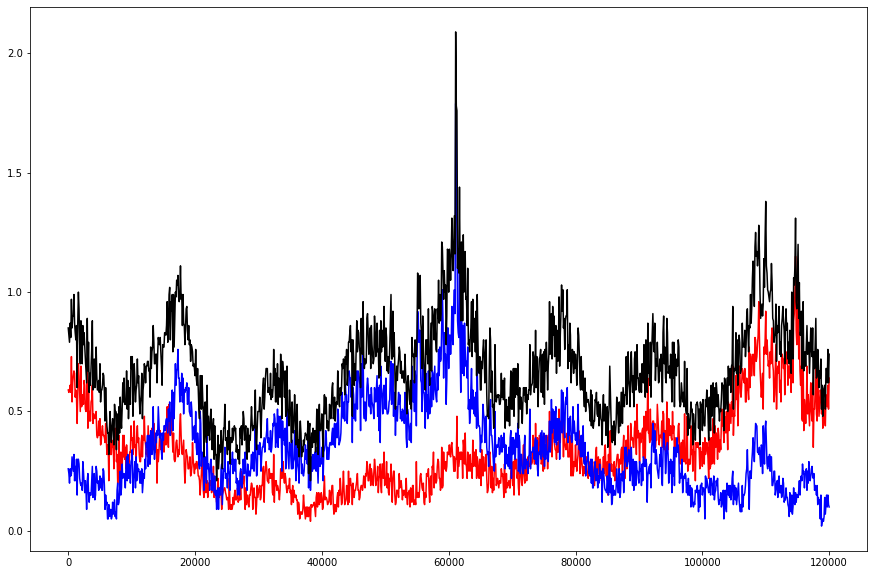

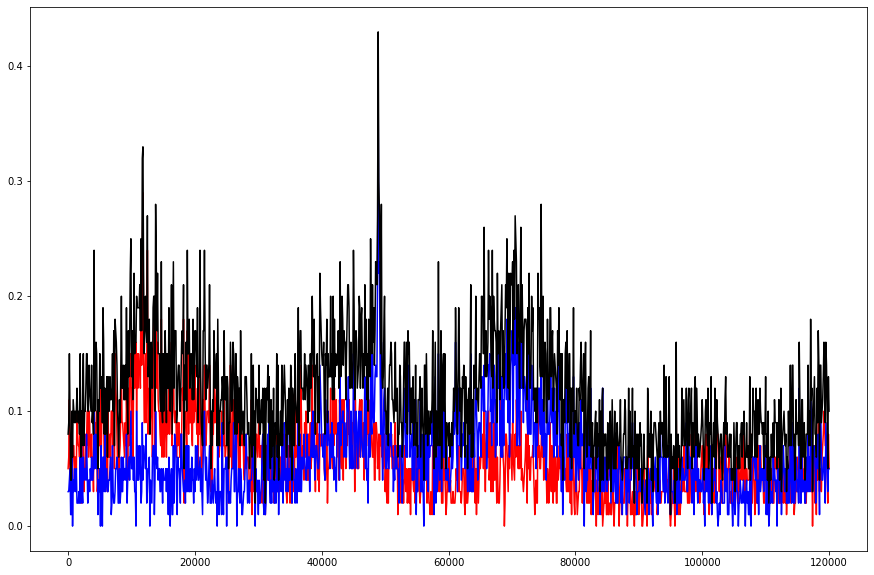

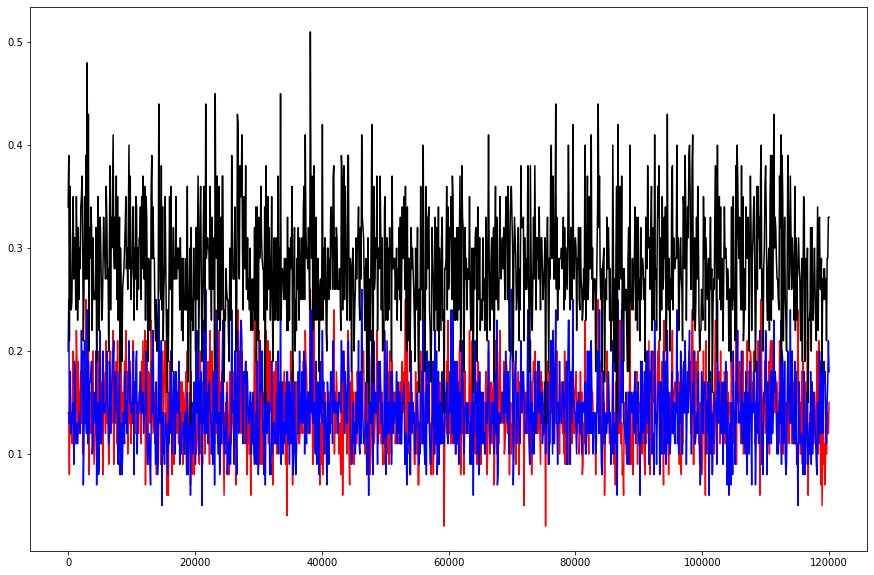

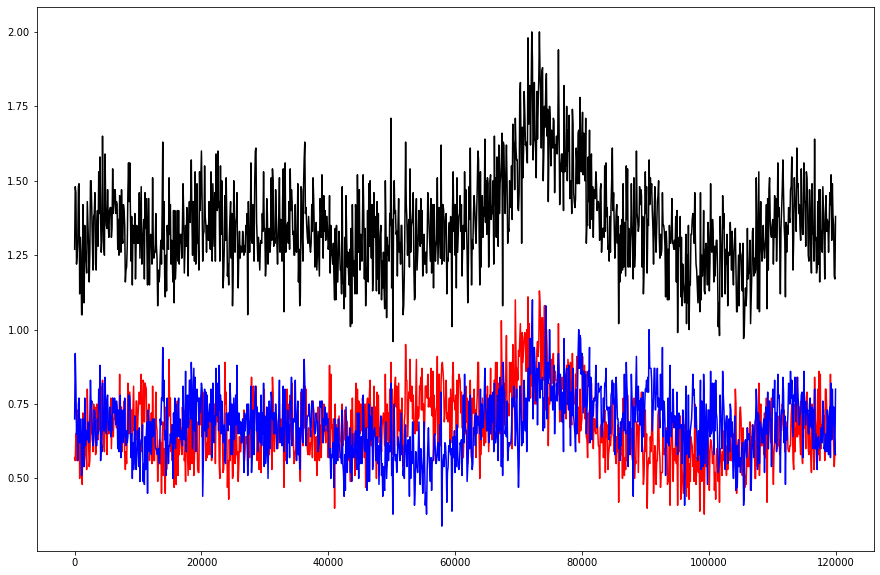

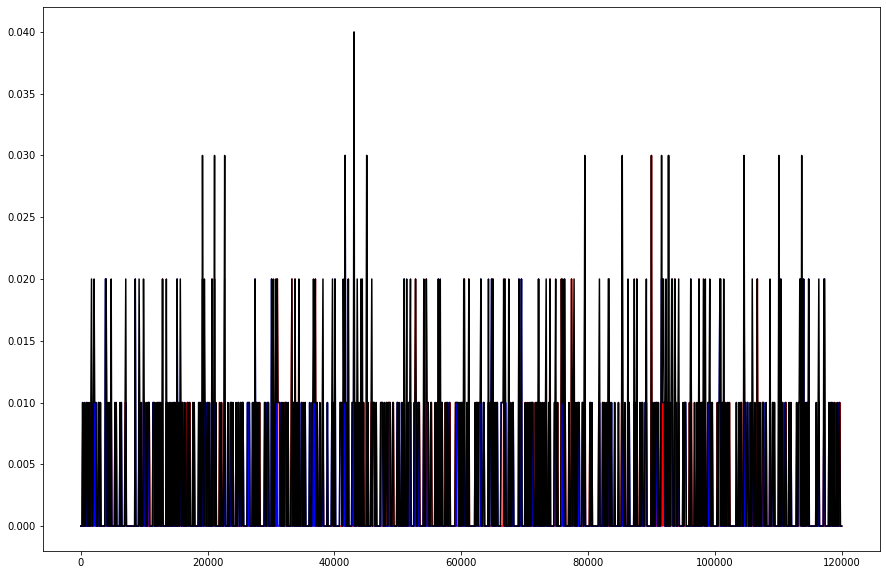

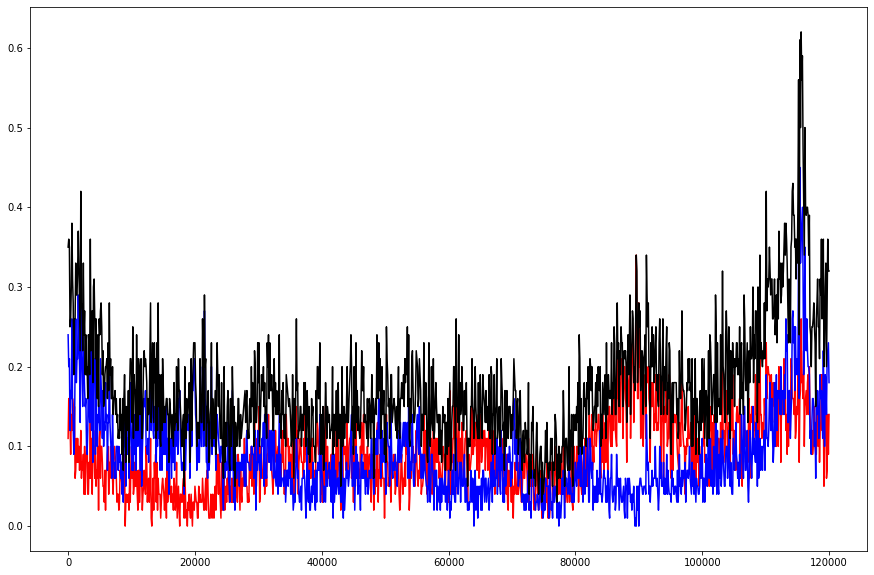

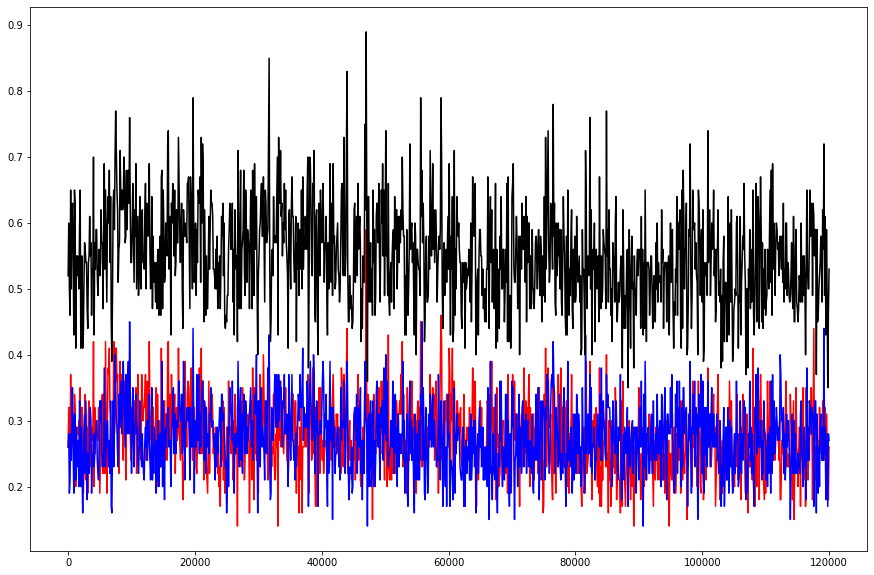

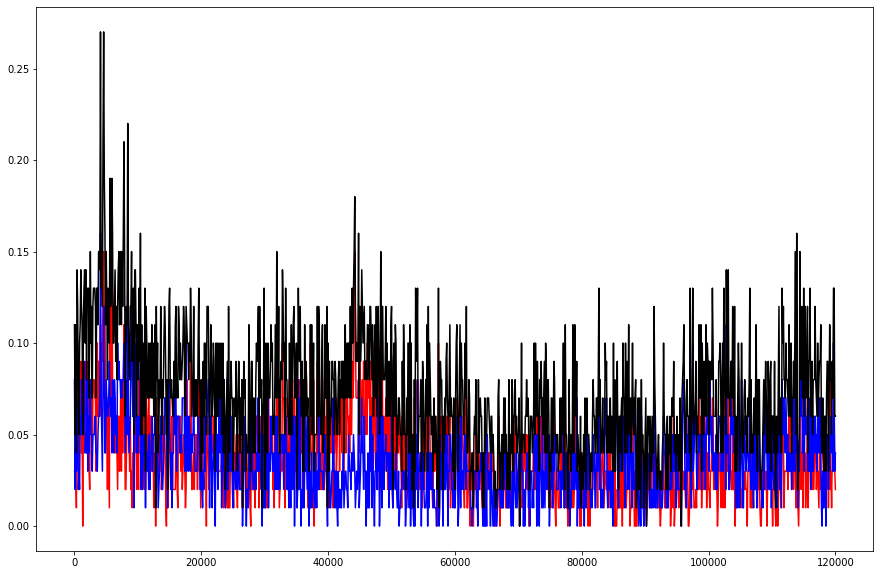

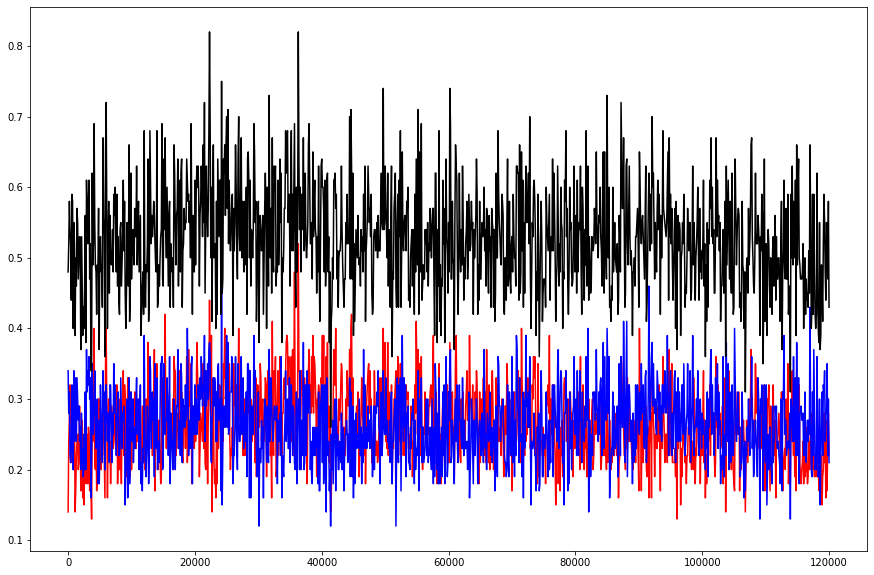

In [11]:
for i in bad_pred_lc_nos:
    if i < 10000:
        plt.plot(qpos_lc[0],qpos_lc[int(i)+1],color='r')
        plt.plot(qpoh_lc[0],qpoh_lc[int(i)+1],color='b')
        plt.plot(qpof_lc[0],qpof_lc[int(i)+1],color='k')
        plt.show()

In [12]:
tsne_transform = TSNE().fit_transform(all_feats[:,1:127])


[]

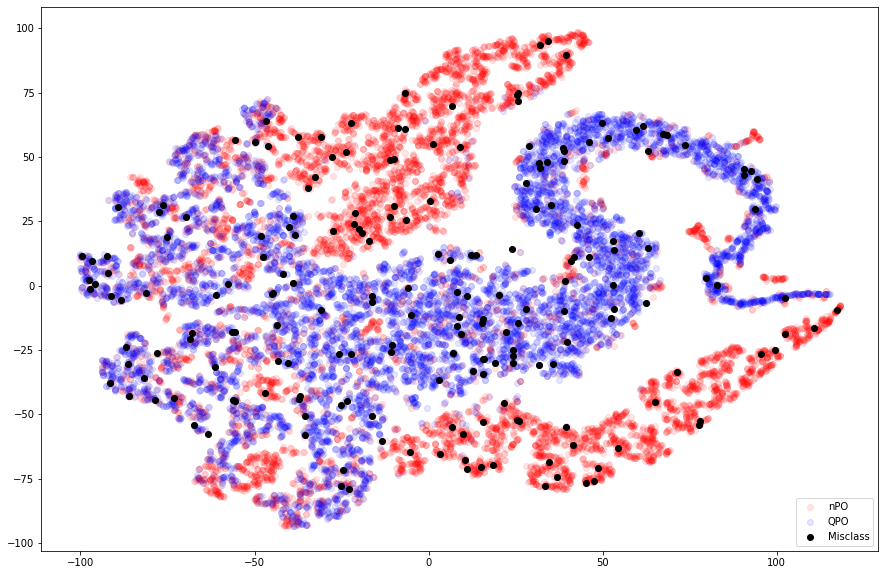

In [13]:
qpo_idxs = np.where(all_feats[:,-1] == 1)[0]
npo_idxs = np.where(all_feats[:,-1] == 0)[0]
plt.scatter(tsne_transform[npo_idxs,0],tsne_transform[npo_idxs,1],color='r',alpha=0.1,label='nPO')
plt.scatter(tsne_transform[qpo_idxs,0],tsne_transform[qpo_idxs,1],color='b',alpha=0.1,label='QPO')
plt.scatter(tsne_transform[bad_pred_lc_nos,0],tsne_transform[bad_pred_lc_nos,1],color='k',label='Misclass')
plt.legend(loc='lower right')
plt.plot()